# MICROSOFT STUDIOS

This is an analysis of movies using their genre, grossing,ratings and review to find out the best type of movies depending on their genre and ratings for microsoft to include in their new **Microsoft Studios**.

Import libraries and dataframes to use in the project.

In [1]:
# importing useful  libraries to use in the project.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
from scipy.stats import pearsonr
%matplotlib inline

In [2]:
# loading data using pandas
title_basics= pd.read_csv('imdb.title.basics.csv.gz')
ratings = pd.read_csv('imdb.title.ratings.csv.gz')
budget_df = pd.read_csv("tn.movie_budgets.csv.gz")
title_gross = pd.read_csv('bom.movie_gross.csv.gz')

Previewing  the loaded dataframes to see what kind of data we are working with.

In [3]:
# title basics columns
print (title_basics.columns)

# information on table
print(title_basics.info())

# data table.
title_basics.head()

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [4]:
# ratings columns
print(ratings.columns)

# information about table
print (ratings.info())

# ratings table
ratings.head()


Index(['tconst', 'averagerating', 'numvotes'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
None


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [5]:
# grossing columns
print(title_gross.columns)

# info about table
print(title_gross.info())

# title gross table
title_gross.head()

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


### 1st Insight : Which are the highest rated movies and how does it equate to the number of reviews votes by the public ?

We need to look at the best movies according to available ratings so as to know which movies are liked by people and under what genre do they lie. This will enable further analysis of those movies that have been singled out.

### Merging data

In [6]:
# merging the title basics and ratings data into one df using tconst column.
merged_df = pd.merge(title_basics, ratings, on ='tconst' )
# info on table
print(merged_df.info()
)
merged_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB
None


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In the merged dataframe has three types of data types in 7386 rows and 8 columns, with only the column of ***runtime_minutes*** having missing values

#### CLEANING  UP THE DATA.

#### Checking for missing values.

In [7]:
def missing_data(df):
    nan_df = df[df.isna().any(axis=1)]

    return nan_df.head()

In [8]:
missing_data(merged_df)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
5,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32
17,tt0250404,Godfather,Godfather,2012,NaN,"Crime,Drama",6.7,236
18,tt0253093,Gangavataran,Gangavataran,2018,134.0,NaN,6.6,8
21,tt0263814,On kadin,On kadin,2019,NaN,Drama,7.1,100


The data missing from dataframe will not be used in the analysis thus does not affect the results.


1st let us make sure there is significant number of votes that were casted so as to have a concrete rating.

In [9]:
# describe the dataframe in terms of its mean , mode, std etc.
merged_df.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,66236.000000,73856.000000,7.385600e+04
mean,2014.276132,94.654040,6.332729,3.523662e+03
std,2.614807,208.574111,1.474978,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,4.900000e+01
75%,2016.000000,104.000000,7.400000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


Using the information above we can now use the mean of the number of votes casted = 3523.662 rounding of to 3524 votes.  as our baseline for finding the best rated  movies, We'll create a separate dataframe called ranked_movies_df where the number of votes column is greater than 3524 votes. We will then sort by average rating to rank movies in terms of popularity.

In [42]:
# finding votes greater than the mean
movie_rating_df = merged_df[merged_df['numvotes'] >3524]
movie_rating_df.head()


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
16,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248
31,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378
41,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886
47,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300


In [11]:
# sort the movies by ratings
ranked_movies_df = movie_rating_df.sort_values(by= ['numvotes'], ascending= False)
ranked_movies_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
2387,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2241,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769
280,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334
12072,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405
325,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655


Based on the number of we can see the top rated movies depending on the number of votes casted.

#### Plotting the Scatter plot.

The scatter plot will show me the correlation between the number of votes casted and the rating of the movies.

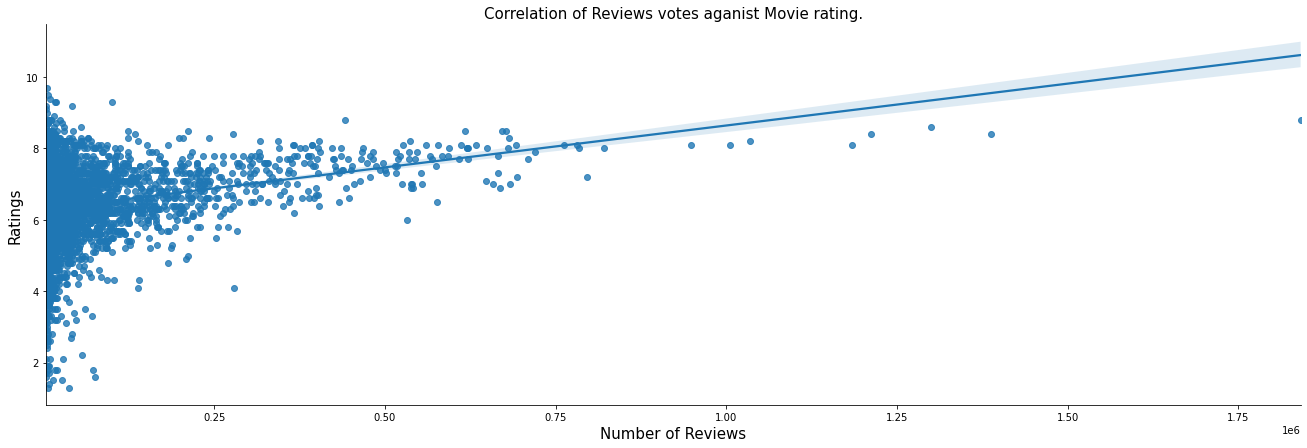

In [43]:
# defining the variables
ax1 = sns.lmplot(x='numvotes', y='averagerating',data=ranked_movies_df, height=6, aspect=3)
# setting up the trendline
plt.ticklabel_format(axis='x', style='sci', scilimits=(6,6))
# defining the axis y, x & title labels.
plt.xlabel('Number of Reviews', fontsize=15)
plt.ylabel('Ratings', fontsize=15)
plt.title('Correlation of Reviews votes aganist Movie rating.', fontsize=15)
plt.savefig('MovieRating');

The positive trendline shows that the higher the number of votes the higher the quality of the rating of movie

**Conclusion** This show that the highest rated movies were exposed to to plenty of viewers who gave their review in form of a vote as shown in the scatter plot thus for a movie to have a high quality rating, Microsoft should expose it to the public as much as possible using advertisemnts so that they could rate the quality of the movies they produce.

#### 2nd Insight : What is the budget of the most profitable movies ?

For profits we need we need the budget data and the grossing data so as to calculate the profits from each movie.
This can be calculated by Profit = Worldwide Gross of the movie - Production Budget of the movie.

In [13]:
# add the required data.
budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


#### Data cleaning.

In [14]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [15]:
# lets clean the data by removing $ sign and , to allow for calculation between columns
budget_df['production_budget'] = budget_df['production_budget'].str.replace(',','').str.replace('$','').astype('int64')
budget_df['domestic_gross'] = budget_df['domestic_gross'].str.replace(',','').str.replace('$','').astype('int64')
budget_df['worldwide_gross'] = budget_df['worldwide_gross'].str.replace(',','').str.replace('$','').astype('int64')



#### Calculating the Profit


In [16]:
# creating and calculating the profit column.
budget_df['profit'] = budget_df['worldwide_gross'] - budget_df['production_budget']


In [17]:
# checking the information on the table
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
 6   profit             5782 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 316.3+ KB


In [18]:
# sorting the profit column.
# ensuring no profit budget equal to 0 which will be an outlier
profitable_movies = budget_df.loc[budget_df['profit'] > 0]
# ranking the values with the highest profit.
profitable_ranked_df = profitable_movies.sort_values(by=['profit'], ascending=False)
# reset the index
profitable_ranked_df.reset_index(inplace=True)
profitable_ranked_df.head()

,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395
2,6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200
3,5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220
4,33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864


Lets plot a graph of profit aganist the budget for the movies using seaborn libraries.

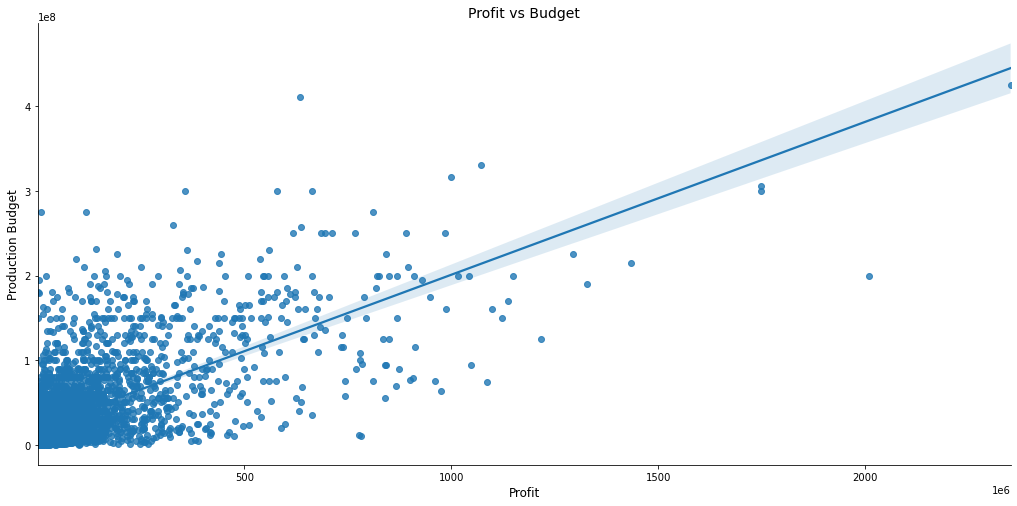

In [91]:
# defining the variables
ax1 = sns.lmplot(x='profit', y='production_budget',data= profitable_ranked_df, height=7, aspect=2)
# setting the ticklabel
plt.ticklabel_format(axis='x', style='sci', scilimits=(6,6))
# defining the axis y, x & title labels.
plt.xlabel('Profit', fontsize=12)
plt.ylabel('Production Budget', fontsize=12)
plt.title('Profit vs Budget', fontsize=14)
plt.savefig('ProfitvBudget');

The positive trend line shows that increase in budget will lead to increase in the profits of the movie produced. As shown in the scatter plot.

In [20]:
profitable_ranked_df['production_budget'].describe()

count    3.657000e+03
mean     3.844772e+07
std      4.745361e+07
min      1.100000e+03
25%      7.000000e+06
50%      2.000000e+07
75%      5.000000e+07
max      4.250000e+08
Name: production_budget, dtype: float64

In [21]:
profitable_ranked_df.loc[0:30, 'production_budget'].describe()

count    3.100000e+01
mean     1.877387e+08
std      8.711034e+07
min      6.300000e+07
25%      1.200000e+08
50%      1.950000e+08
75%      2.200000e+08
max      4.250000e+08
Name: production_budget, dtype: float64

We can see that for our movie to be succesful we need a production budget of atleast $38,447,720 which is the mean for all the movies. But to get a proper budget for the top movies  get the mean of the production budget of the top 30 movies. Microsoft need atleast $187,738,700 to produce a good movie. 

In [22]:
profitable_ranked_df.loc[0:30, 'profit'].describe()

count    3.100000e+01
mean     1.160262e+09
std      3.540196e+08
min      8.744962e+08
25%      9.384260e+08
50%      1.042521e+09
75%      1.182476e+09
max      2.351345e+09
Name: profit, dtype: float64

From the analysis above using the budget we can get the profit that the top movies got.Their mean will show the average profit of the top 30 movies and this can be used to estimate the total amount of profit that Microsoft X will recieve if they use the defined budget per movie. Which will be **$1,160,262,000** .



Lets look at the top 30 movies so the we can get to know how much profit and budget per movie by creating a comparison bar graph between the profit and budget .

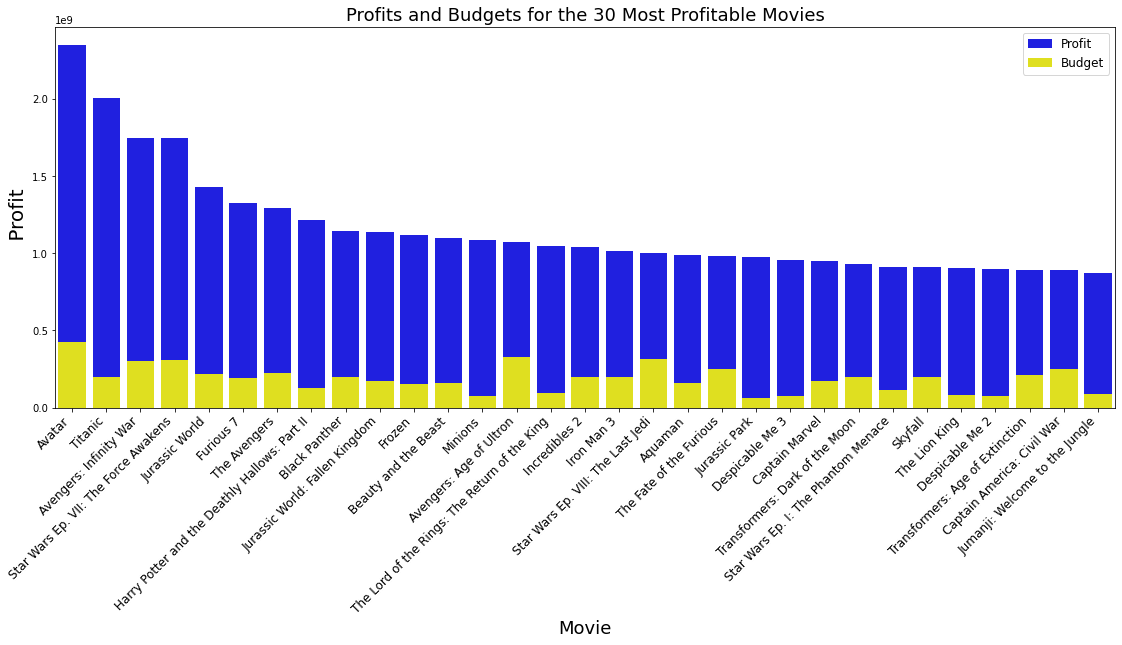

In [92]:
# defining graph bounds
plt.figure(figsize=(19,7))
# Defining the graph variables of movie vs profit
sns.barplot(x=profitable_ranked_df.loc[0:30, 'movie'],y=profitable_ranked_df.loc[0:30, 'profit'], color='blue', label='Profit')
            
# Defining the graph variables of movie vs production_budget
sns.barplot(x=profitable_ranked_df.loc[0:30, 'movie'],y=profitable_ranked_df.loc[0:30, 'production_budget'], color='yellow', label='Budget')
            
# Define the axes of the graph.
plt.xlabel('Movie', fontsize=18)
plt.title("Profits and Budgets for the 30 Most Profitable Movies", fontsize=18)
plt.ylabel(' Profit', fontsize=20)
plt.xticks(rotation=45, horizontalalignment='right', fontsize=12)
plt.legend(fontsize=12)
plt.savefig('30profvsbudget');

We could do for more movies but it distorts the visualization of the graph.
We can see that the top movies have really large profits with Avatar,Titanic and Avengers: Infinity War being the top with large profits.

**Conclusion:** For Microsoft Studios to produce a good movie they need a budget of atleast **$ 187,738,700** million .

 Which will achieve a profit of **$ 1,160,262,000**.  Which will be a Billion dollars with some change!!

### 3rd Insight: Which Studios grossed the highest profits?

Lets start by getting the diffrent genres produced.


In [106]:
title_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [107]:
profitable_ranked_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3657 entries, 0 to 3656
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              3657 non-null   int64  
 1   id                 3657 non-null   int64  
 2   release_date       3657 non-null   object 
 3   movie              3657 non-null   object 
 4   production_budget  3657 non-null   float64
 5   domestic_gross     3657 non-null   float64
 6   worldwide_gross    3657 non-null   float64
 7   profit             3657 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 228.7+ KB


In [108]:
# converting the column datatypes to be uniform.
profitable_ranked_df['domestic_gross']=profitable_ranked_df['domestic_gross'].astype('float64')
profitable_ranked_df['production_budget'] = profitable_ranked_df['production_budget'].astype('float64')
profitable_ranked_df['worldwide_gross'] = profitable_ranked_df['worldwide_gross'].astype('float64')
profitable_ranked_df['profit'] = profitable_ranked_df['profit'].astype('float64')


In [109]:
# Merging the data from profitable ranked and title gross dataframes
studio_gross=pd.merge(profitable_ranked_df,title_gross, on= 'domestic_gross')

In [110]:
studio_gross.head()

,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,title,studio,foreign_gross,year
0,4775,76,"Feb 15, 1950",Cinderella,2900000.0,85000000.0,263591415.0,260691415.0,The Expendables 2,LGF,229900000,2012
1,1825,26,"Jun 29, 1979",Moonraker,31000000.0,70300000.0,210300000.0,179300000.0,The Big Short,Par.,63200000,2015
2,3182,83,"Jul 13, 1977",The Spy Who Loved Me,14000000.0,46800000.0,185400000.0,171400000.0,How to Be Single,WB (NL),65500000,2016
3,3182,83,"Jul 13, 1977",The Spy Who Loved Me,14000000.0,46800000.0,185400000.0,171400000.0,Breaking In (2018),Uni.,4600000,2018
4,2048,49,"Jun 26, 1981",For Your Eyes Only,28000000.0,54800000.0,195300000.0,167300000.0,This Means War,Fox,101700000,2012


#### Checking for missing values.

We are going to check for missing values in `studio_gross` df and how they are going to affect the analysis.

In [111]:
# Defining a function to check missing values.
def missing_data(df):
    nan_df = df[df.isna().any(axis=1)]

    return nan_df.head()

In [112]:
# check for missing values
missing_data(studio_gross)

,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,title,studio,foreign_gross,year
18,4887,88,"Apr 8, 1964",From Russia With Love,2000000.0,24800000.0,78900000.0,76900000.0,Our Idiot Brother,Wein.,NaN,2011
28,5074,75,"Apr 20, 1979",Dawn of the Dead,1500000.0,5100000.0,55000000.0,53500000.0,Bleed for This,ORF,NaN,2016
29,5074,75,"Apr 20, 1979",Dawn of the Dead,1500000.0,5100000.0,55000000.0,53500000.0,Colette,BST,NaN,2018
50,3400,1,"Mar 20, 1981",The Postman Always Rings Twice,12000000.0,12200000.0,44200000.0,32200000.0,Before I Fall,ORF,NaN,2017
52,5525,26,"Apr 15, 1983",The Evil Dead,375000.0,2400000.0,29400000.0,29025000.0,The Queen of Versailles,Magn.,NaN,2012


Missing data is on the foreign gross column which will not be used on this analysis.

In [113]:
#  studio count 
studio_counts = studio_gross['studio'].value_counts()
studio_counts

SPC      56
FoxS     39
Wein.    27
WB       26
IFC      19
         ..
Osci.     1
CE        1
ENTMP     1
ParV      1
GK        1
Name: studio, Length: 71, dtype: int64

In [114]:
# sorting the list for studios prducing more than 10 movies
studio_list = studio_counts[studio_counts >= 10].index.tolist()
# adding the list in the dataframe.
studio_gross = studio_gross[studio_gross['studio'].isin(studio_list)]

In [115]:
studio_gross.head()

,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,title,studio,foreign_gross,year
1,1825,26,"Jun 29, 1979",Moonraker,31000000.0,70300000.0,210300000.0,179300000.0,The Big Short,Par.,63200000,2015
3,3182,83,"Jul 13, 1977",The Spy Who Loved Me,14000000.0,46800000.0,185400000.0,171400000.0,Breaking In (2018),Uni.,4600000,2018
4,2048,49,"Jun 26, 1981",For Your Eyes Only,28000000.0,54800000.0,195300000.0,167300000.0,This Means War,Fox,101700000,2012
5,2048,49,"Jun 26, 1981",For Your Eyes Only,28000000.0,54800000.0,195300000.0,167300000.0,Office Christmas Party,Par.,59700000,2016
6,3993,94,"Jun 27, 1973",Live and Let Die,7000000.0,35400000.0,161800000.0,154800000.0,The Watch,Fox,32900000,2012


Calculation of profit margin

In [116]:
# #Calculate the Profit Margin

studio_gross['profit_margin'] = studio_gross['profit'] / studio_gross['worldwide_gross']


In [117]:
# sorting the data to get the profit per studio.

studio_profit_df = studio_gross.groupby('studio', as_index=False)[['profit', 'profit_margin']].mean().sort_values(by='profit', ascending=False)

In [118]:
top_studios=(studio_profit_df.describe())
top_studios

,profit,profit_margin
count,1.800000e+01,18.000000
mean,1.416654e+07,0.685678
std,1.289484e+07,0.050071
min,2.606576e+06,0.604535
25%,5.614206e+06,0.641537
50%,8.674332e+06,0.686583
75%,1.820058e+07,0.702114
max,4.562689e+07,0.791910


Filtering the profit using the mean as the base line.

In [119]:
studio_profit_df = studio_profit_df[studio_profit_df['profit'] >1.408732e+07]

In [120]:
studio_profit_df

,studio,profit,profit_margin
14,Uni.,4.562689e+07,0.740961
10,Par.,3.691120e+07,0.634072
5,Fox,3.678872e+07,0.791910
12,Rela.,2.069622e+07,0.765092
15,WB,1.975089e+07,0.735502


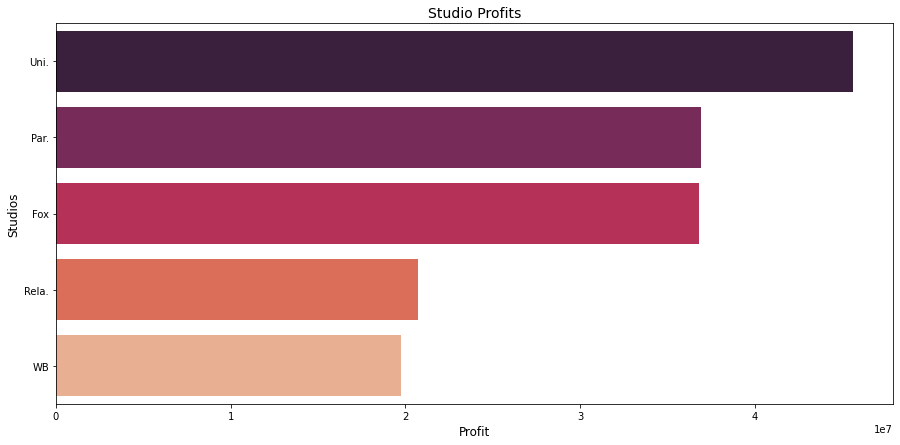

In [121]:
# plotting the graph
plt.figure(figsize=(15,7))
# Defining the variables 
ax3 = sns.barplot(x=studio_profit_df['profit'], y=studio_profit_df['studio'], palette='rocket')
# defining the axes of the graph
plt.xlabel('Profit', fontsize=12)
plt.ylabel('Studios', fontsize=12)
plt.title('Studio Profits', fontsize=14)
plt.savefig('Studioprofits');


Looking at the bargraph we can see the top studios based on the amount of profits that they make this will enable Microsoft to make a descion on the best studios to work with with the top being Uni. for Universal studios.


Lets check the profit margin of the top studios.By plotting a graph of studios aganist profit margin.

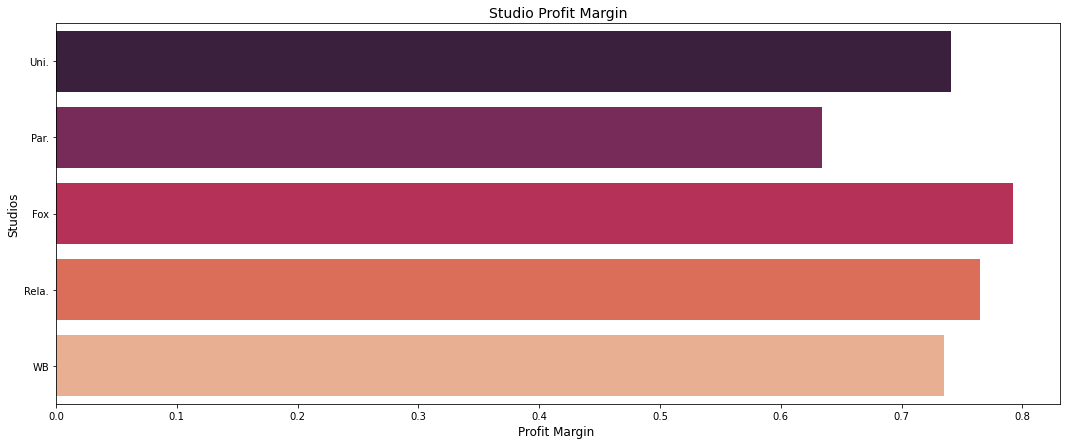

In [122]:
# plotting the graph
plt.figure(figsize=(18,7))
# Defining the variables 
ax3 = sns.barplot(x=studio_profit_df['profit_margin'], y=studio_profit_df['studio'], palette='rocket')
# defining the axes of the graph
plt.xlabel('Profit Margin ', fontsize=12)
plt.ylabel('Studios', fontsize=12)
plt.title('Studio Profit Margin', fontsize=14)
plt.savefig('Profitmargin');

**Conclusion:**  Based on profit margin we can see that  the top studios with the best profit margins  which include Fox Studos and Universal Studios having the highest profit margin thus Microsoft can decide to contract them in movie production or collaborations.